In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#This function lets you activate matplotlib interactive support
# at any point during an IPython session.
# In [1]: %matplotlib inline
# In this case, where the matplotlib default is TkAgg:

from sklearn.tree import DecisionTreeRegressor
from pydotplus import graph_from_dot_data #Load graph as defined by data in DOT format.
from sklearn.tree import export_graphviz #Export a decision tree in DOT format.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Position_Salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


###**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [7]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

###**Model fit & training**

In [8]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [9]:
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

###**Prediction**

In [10]:
y_pred = regressor.predict(np.reshape(np.array(11),(-1, 1))) #Predict class or regression value for X.
y_pred

array([1000000.])

###**Saving Decision tree**

In [11]:
dot_data = export_graphviz(regressor, filled=True, rounded=True)
graph = graph_from_dot_data(dot_data)
graph.write_png("regressor_position.png")

True

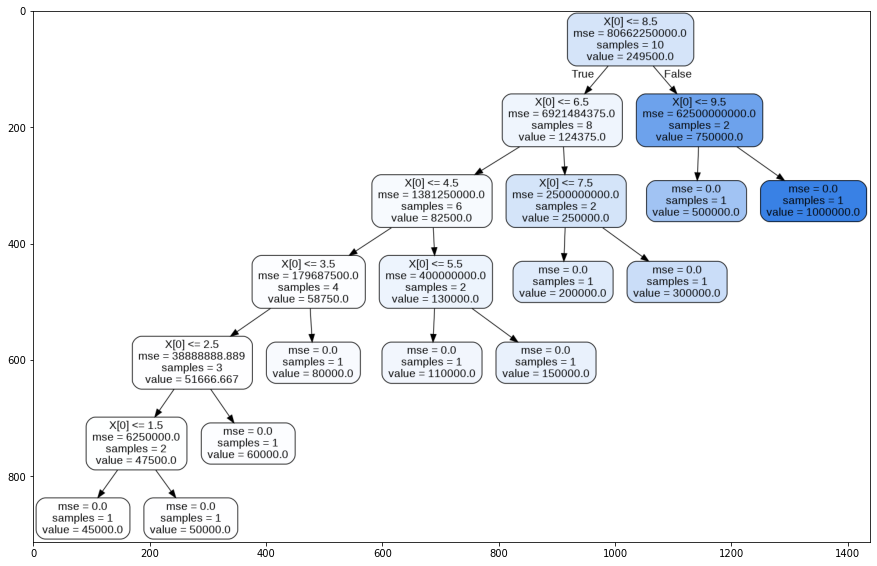

In [15]:
import cv2
img = cv2.imread("regressor_position.png")
plt.figure(figsize = (15, 15))
plt.imshow(img)